In [23]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [9]:
def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
        r = R* u**(1./3.)
        
        X = np.append(X, r*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, r*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, r*np.cos(theta))
    
    return X, Y, Z
     
Radio = 1.0    
Npoints = 10000
data_sphere = CreateSphere(Npoints, Radio)
data_sphere = np.array(data_sphere)

In [10]:
data = np.random.rand(300,3)

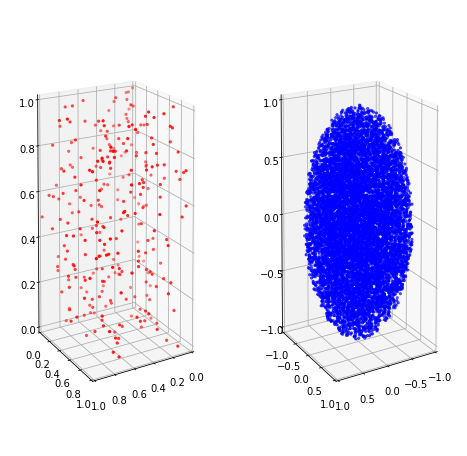

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax1 = fig.add_subplot(1,2,2, projection = '3d')


#configurar límites de los ejes
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax1.set_xlim3d(-Radio, Radio)
ax1.set_ylim3d(-Radio, Radio)
ax1.set_zlim3d(-Radio, Radio)

ax.view_init(10, 60)
ax1.view_init(10, 60)


ax.scatter(data[:,0], data[:,1], data[:,2], color='r', marker='.')
ax1.scatter(data_sphere[0], data_sphere[1], data_sphere[2], color='b', marker='.')

#plt.savefig('3dPoints.pdf')
plt.show()

# Integracion con opcion cartesiana.

In [12]:
def FunctionI(x,y,z):
    return np.exp( np.sqrt(x**2+y**2+z**2) )

In [13]:
def CalculateIntegral(data, Npoints, R):
    
    integral = 0.
    
    for i in range(Npoints):
        
        integral += FunctionI(data[0][i],data[1][i],data[2][i])
    
    Norma = (4.*np.pi)*(R**3)/3.
    
    integral *= Norma/Npoints
    
    return integral

In [25]:
integral = CalculateIntegral(data_sphere, Npoints, 1.0)
print(integral)

9.047671752577916


# Integracion con opcion esferica

In [17]:
def FunctionE(r,theta):
    return np.exp(r)*r**2 * np.pi * np.sin(theta*np.pi)

In [18]:
def GetIntegral(Npoints):
    
    r = np.random.rand(Npoints)
    theta = np.random.rand(Npoints)
    
    Func = FunctionE(r,theta)
    
    integral = 2.*np.pi*np.average(Func)
    
    return integral

In [24]:
# Vamos a hacer varios intentos

Int_v = []
Int_v = np.array(Int_v)

for i in tqdm(range(100)):
    Int_v = np.append(Int_v, GetIntegral(Npoints))

print(np.average(Int_v))

100%|██████████| 100/100 [00:00<00:00, 1737.53it/s]

9.034752865887521
